# Time series components

## Data

In [2]:
import pandas as pd

df = pd.read_parquet("./fuel_type_data_california.parquet")
'''
A Parquet file is a free and open-source columnar storage format within the Apache Hadoop ecosystem, 
designed for efficient data processing, particularly in big data applications.

Key characteristics of Parquet files:

Columnar Storage: Unlike row-based formats (like CSV), Parquet organizes data by columns, storing all values for a specific column contiguously. 
This optimizes storage and query performance, especially for analytical queries focusing on a subset of columns.

Binary Format: Parquet files store data in a binary format, 
reducing the overhead of textual representation and making them unreadable in a standard text editor.

Data Compression: Parquet supports various compression algorithms (e.g., Snappy, Gzip, LZ4), 
leading to significantly smaller file sizes compared to uncompressed formats. 

Embedded Metadata: Parquet files include metadata providing information about the schema, 
compression settings, column locations, and other details, aiding efficient data reading and processing.

Structure: A Parquet file is fundamentally divided into a header, data, and footer. 
The data section is further subdivided into Row Groups, Column Chunks, and Pages, 
allowing for efficient data access by only reading necessary blocks. 
'''
df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2025-04-22 20:00:00-07:00,CAL,California,BAT,Battery storage,179,megawatthours
1,2025-04-22 20:00:00-07:00,CAL,California,COL,Coal,216,megawatthours
2,2025-04-22 20:00:00-07:00,CAL,California,GEO,Geothermal,457,megawatthours
3,2025-04-22 20:00:00-07:00,CAL,California,NG,Natural Gas,8601,megawatthours
4,2025-04-22 20:00:00-07:00,CAL,California,NUC,Nuclear,1134,megawatthours
...,...,...,...,...,...,...,...
452543,2018-12-31 17:00:00-07:00,CAL,California,OIL,Petroleum,88,megawatthours
452544,2018-12-31 17:00:00-07:00,CAL,California,OTH,Other,697,megawatthours
452545,2018-12-31 17:00:00-07:00,CAL,California,SUN,Solar,1595,megawatthours
452546,2018-12-31 17:00:00-07:00,CAL,California,WAT,Hydro,2880,megawatthours


In [ ]:
# Both approaches (boolean masking and query) will correctly filter the data. 
# Preference depends on which syntax the coder finds clearer or more expressive for the situation.

#boolean masking example:
'''
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 35],
        'City': ['New York', 'London', 'Paris', 'New York']}
df = pd.DataFrame(data)

# Create a boolean mask for ages greater than 25
age_mask = df['Age'] > 25
print("Age Mask:")
print(age_mask)

    Age Mask:
    0    False
    1     True
    2    False
    3     True
    Name: Age, dtype: bool

# Apply the mask to filter the DataFrame
filtered_df = df[age_mask]
print("\nFiltered DataFrame:")
print(filtered_df)

    Filtered DataFrame:
        Name  Age      City
    1    Bob   30    London
    3  David   35  New York
'''

In [3]:
df_query0 = (df
 .query('fueltype == "SUN"') #mask
 .set_index('period')
 .sort_index() #needed to avoid: KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'
 .loc['2019':'2024'] #limiting to these years as results from 2018 and 2025 are NOT complete
 .resample(rule='ME')['value'].sum() #for monthly totals
 .to_frame() #without .to_frame(), the output is: <class 'pandas.core.series.Series'>
)
print(type(df_query0))
df_query0

<class 'pandas.core.frame.DataFrame'>


,value
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


In [4]:
# .. a different way:
FUELTYPE = 'SUN'
df = (df
 .query('fueltype == @FUELTYPE')
 .set_index('period')['value'].to_frame()
 .sort_index()
 .loc['2019':'2024']
 .resample('ME')
 .sum()
)

df

,value
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


In [5]:
df.columns = ['values']
df

,values
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


In [6]:
series = df["values"]
print(type(series)) #note: this is a pandas series, NOT pandas DataFrame; this is passed to below
series

<class 'pandas.core.series.Series'>


,values
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


## Individual component behaviour based on model

Components:

- Trend (T)
- Seasonality (S)
- Residual or Irregular Component (I)

Models:

- Additive model: $y_t = T_t + S_t + e_t$
- Multiplicative model: $y_t = T_t \times S_t \times e_t$

In [7]:
import statsmodels.api as sm

### Additive model

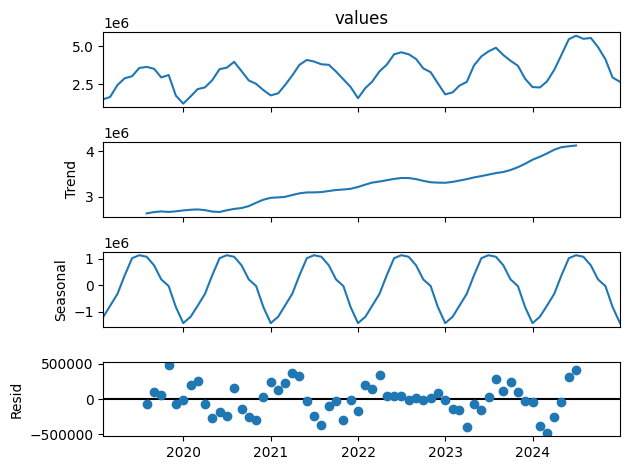

In [8]:
result = sm.tsa.seasonal_decompose(series, model='additive', period=12)
# Understanding seasonal changes allows analysts to anticipate fluctuations in solar energy output, 
# ensuring more accurate predictions and better-informed decisions in energy management.

result.plot();

### Multiplicative model

# A multiplicative model is suitable when the amplitude of seasonal and trend components increases or decreases in line with the overall magnitude of the data, making the components' effects proportional rather than constant.

# the residual component in a multiplicative time series decomposition model typically center around 1, rather than 0
# In a multiplicative model, the original value is obtained by multiplying the trend, seasonal, and residual components. Multiplying by 1 leaves the product unchanged, so the residual centers around 1.

# If the residuals in the multiplicative model are more constrained (less scattered) and lack large peaks seen in the additive model, it suggests the multiplicative model more accurately captures the structure of the data.

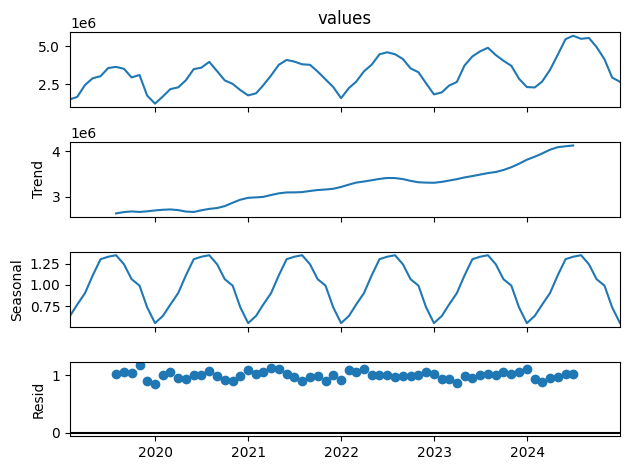

In [9]:
result = sm.tsa.seasonal_decompose(series, model='multiplicative', period=12)
result.plot();

## Math calculation

### Additive model

In [10]:
result = sm.tsa.seasonal_decompose(series, model='additive', period=12)

In [11]:
r = (df
 .assign(
    trend = result.trend, #trend is the 12-month rolling average here
    seasonal = result.seasonal,
    residual = result.resid) #residual is the portion NOT captured by 2 components above
 .dropna())

r

,values,trend,seasonal,residual
period,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.079584e+06,-64138.611111
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,7.548708e+05,106664.805556
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,2.218577e+05,62330.847222
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,-3.136406e+04,486281.063889
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,-8.245175e+05,-76249.544444
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,-1.436805e+06,-10032.319444
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,-1.193623e+06,206237.097222
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,-7.825423e+05,259962.388889
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,-3.249668e+05,-67126.969444


In [12]:
r['model_result'] = r.trend + r.seasonal + r.residual #this should be matching the original data (values column)
r

,values,trend,seasonal,residual,model_result
period,,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.079584e+06,-64138.611111,3642935.0
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,7.548708e+05,106664.805556,3518060.0
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,2.218577e+05,62330.847222,2955493.0
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,-3.136406e+04,486281.063889,3114174.0
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,-8.245175e+05,-76249.544444,1772165.0
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,-1.436805e+06,-10032.319444,1246203.0
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,-1.193623e+06,206237.097222,1720159.0
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,-7.825423e+05,259962.388889,2192122.0
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,-3.249668e+05,-67126.969444,2308003.0


In [13]:
dfs = {}

In [14]:
dfs['additive'] = r

### Multiplicative model

In [15]:
result = sm.tsa.seasonal_decompose(series, model='multiplicative', period=12)

In [16]:
r = (df
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

r

,values,trend,seasonal,residual
period,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.353946,1.024021
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,1.246044,1.062811
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,1.068914,1.035056
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,0.992595,1.179806
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,0.735015,0.902028
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,0.546378,0.846940
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,0.632452,1.004536
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,0.766042,1.054120
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,0.903809,0.945759


In [17]:
r['model_result'] = r.trend * r.seasonal * r.residual
r

,values,trend,seasonal,residual,model_result
period,,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.353946,1.024021,3642935.0
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,1.246044,1.062811,3518060.0
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,1.068914,1.035056,2955493.0
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,0.992595,1.179806,3114174.0
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,0.735015,0.902028,1772165.0
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,0.546378,0.846940,1246203.0
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,0.632452,1.004536,1720159.0
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,0.766042,1.054120,2192122.0
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,0.903809,0.945759,2308003.0


In [18]:
dfs['multiplicative'] = r

## Visual comparison

In [19]:
df = pd.concat(dfs, axis=1).melt(ignore_index=False).reset_index()
df.columns = ["month", "model", "component", "value"]

df

,month,model,component,value
0,2019-07-31 00:00:00-07:00,additive,values,3642935.0
1,2019-08-31 00:00:00-07:00,additive,values,3518060.0
2,2019-09-30 00:00:00-07:00,additive,values,2955493.0
3,2019-10-31 00:00:00-07:00,additive,values,3114174.0
4,2019-11-30 00:00:00-07:00,additive,values,1772165.0
...,...,...,...,...
595,2024-02-29 00:00:00-07:00,multiplicative,model_result,2685249.0
596,2024-03-31 00:00:00-07:00,multiplicative,model_result,3450581.0
597,2024-04-30 00:00:00-07:00,multiplicative,model_result,4421340.0
598,2024-05-31 00:00:00-07:00,multiplicative,model_result,5449656.0


In [21]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
pd.options.plotting.backend = "plotly"
pio.templates["plotly_dark"].layout.update(width=1000, height=500, showlegend=True, autosize=False)


Layout({
    'annotationdefaults': {'arrowcolor': '#f2f5fa', 'arrowhead': 0, 'arrowwidth': 1},
    'autosize': False,
    'autotypenumbers': 'strict',
    'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}},
    'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2,
                                 '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'],
                                 [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7,
                                 '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'],
                                 [1, '#276419']],
                   'sequential': [[0.0, '#0d0887'], [0.1111111111111111,
                                  '#46039f'], [0.2222222222222222, '#7201a8'],
                                  [0.3333333333333333, '#9c179e'],
                                  [0.4444444444444444, '#bd3786'],
                                  [0.5555555555555556, '#d8576b'],
                                  [0.6666666666666666, '#ed7953'],
    

In [22]:
import plotly.express as px

fig = px.line(
    data_frame=df,
    x='month',
    y='value',
    color='component',
    facet_col='model',
    facet_row='component',
    width=1500,
    height=1000,
    facet_col_spacing=0.1,
)

fig.update_yaxes(matches=None)

for attr in dir(fig.layout):
    if attr.startswith("yaxis"):
        axis = getattr(fig.layout, attr)
        if axis:
            axis.showticklabels = True

fig

In [23]:
fig # note: somehow, this figure (right above and here) is showing up in google colab, but not in visual studio code